<a href="https://colab.research.google.com/github/paucaroscanoa/ApiBookAuthor/blob/master/Caso_de_Estudio_5_1_Identificando_nuevos_genes_del_autismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso de Estudio 5.1 - Identificando nuevos genes del autismo

Configuración del *notebook*:

Sincronice su cuenta de Google. Para ello, siga el link que aparece en la salida de la siguiente celda una vez ejecutada. Copie el código que le aparece en pantalla e introdúzcalo en la salida de la celda. Una vez vea el mensaje: `Google Drive sincronizado con éxito!` puede continuar ejecutando el resto de celdas.

In [1]:
from google.colab import auth
auth.authenticate_user()

from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
data_drop = drive.CreateFile({'id':'1Iin0h_JR8qiJl8UmJfa7cq-YZ4ou5n2Q'})
data_drop.GetContentFile('BIOGRID.txt')
data_drop = drive.CreateFile({'id':'10FxN4lVk8-dsbdmVLEWEwoKI1wSFAqKs'})
data_drop.GetContentFile('gene-id-table.txt')
data_drop = drive.CreateFile({'id':'1yWjhKnw2knYtLeeX5mzFrJ-qrtEQgAOx'})
data_drop.GetContentFile('gene-score.csv')
data_drop = drive.CreateFile({'id':'1P4MPEtbrQuIUHraBy3nxCKieGFHjK4HG'})
data_drop.GetContentFile('steiner_tree.R')

print('Google Drive sincronizado con éxito!')

Google Drive sincronizado con éxito!


In [2]:
!pip install rpy2==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314958 sha256=151848f9eefb8e773222d25b9ab8239233787a4c1bc6b6c43f94afe2b197c914
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2


In [3]:
%load_ext rpy2.ipython

Instalar e importar librerías: (ignorar resultados a no ser que no se muestre la frase: `Librerías instaladas con éxito!`)

In [4]:
%%R
install.packages('igraph', dependencies = TRUE)
cat('\n¡Librerías instaladas con éxito!')

(as ‘lib’ is unspecified)


































	‘/tmp/RtmpAJMwsB/downloaded_packages’




¡Librerías instaladas con éxito!

In [5]:
%%R
install.packages('graph')

(as ‘lib’ is unspecified)



In [6]:
%%R
library(igraph)
cat('\n¡Librerías importadas con éxito!')

Attaching package: ‘igraph’



    decompose, spectrum



    union





¡Librerías importadas con éxito!

## Datos


### Red de interacciones proteína-proteína

Cargar la base de datos BIOGRID.

In [7]:
%%R
biogrid <- read.delim("BIOGRID.txt",stringsAsFactors = F)

Ver los diferentes componentes de la base de datos.

In [8]:
%%R
names(biogrid)

 [1] "X.BioGRID.Interaction.ID"     "Entrez.Gene.Interactor.A"    
 [3] "Entrez.Gene.Interactor.B"     "BioGRID.ID.Interactor.A"     
 [5] "BioGRID.ID.Interactor.B"      "Systematic.Name.Interactor.A"
 [7] "Systematic.Name.Interactor.B" "Official.Symbol.Interactor.A"
 [9] "Official.Symbol.Interactor.B" "Synonyms.Interactor.A"       
[11] "Synonyms.Interactor.B"        "Experimental.System"         
[13] "Experimental.System.Type"     "Author"                      
[15] "Pubmed.ID"                    "Organism.Interactor.A"       
[17] "Organism.Interactor.B"        "Throughput"                  
[19] "Score"                        "Modification"                
[21] "Phenotypes"                   "Qualifications"              
[23] "Tags"                         "Source.Database"             


Adjuntar la base de datos al workspace y asignar las interacciones entre proteinas a la variable `HSnet`.

In [9]:
%%R
attach(biogrid)
HSnet <- graph.data.frame(data.frame(Entrez.Gene.Interactor.A,Entrez.Gene.Interactor.B),directed=F)

También podemos ver que forma toma dicha red de interacciones:

In [10]:
%%R
graph.data.frame(data.frame(Entrez.Gene.Interactor.A,Entrez.Gene.Interactor.B),directed=F)

IGRAPH 11b7105 UN-- 20784 272823 -- 
+ attr: name (v/c)
+ edges from 11b7105 (vertex names):
 [1] 6416 --2318  84665--88    90   --2339  2624 --5371  6118 --6774 
 [6] 375  --23163 377  --23647 377  --27236 54464--226   351  --10513
[11] 333  --1600  10370--7020  2033 --7020  338  --4547  409  --5900 
[16] 1436 --2885  7916 --2885  27257--4677  6521 --22950 602  --580  
[21] 153  --10755 672  --466   672  --4436  672  --580   672  --2956 
[26] 421  --1013  5092 --775   5664 --823   825  --7273  3708 --767  
[31] 9223 --1499  5925 --1523  7251 --1026  4998 --4171  5000 --4171 
[36] 4174 --4171  8317 --4171  4999 --4171  6118 --4171  10926--4171 
+ ... omitted several edges


La siguiente línea le permitirá trazar la red, pero le llevará algo de tiempo. El resultado tendrá mejor calidad si lo ejecuta en un entorno nativo de R (como por ejemplo RStudio).

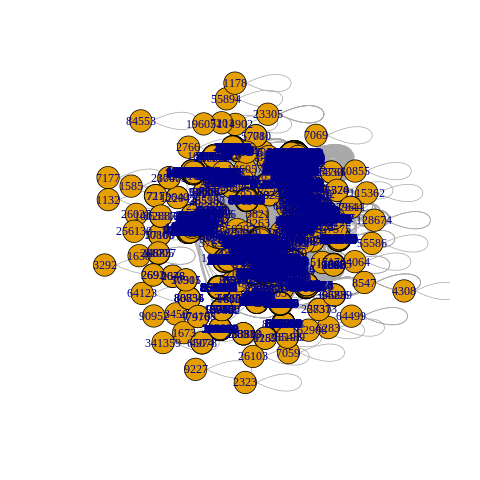

In [11]:
%%R
plot(HSnet)

Ahora podemos obtener la matriz de adyacencia de la red, $A$. Como la matriz es muy extensa, podemos visualizar la primera sección de 15x15 celdas:


In [12]:
%%R
A <- get.adjacency(HSnet)
A[1:15,1:15]

15 x 15 sparse Matrix of class "dgCMatrix"


                                    
6416  1 . . . . . . . 1 . .  . . 2 .
84665 . . . . . . . . . . .  . . . .
90    . . 1 . . . . . . . .  . . . .
2624  . . . . . . . . . . .  1 . . .
6118  . . . . . . . 1 1 . .  . . . .
375   . . . . . 1 1 . . . .  . . . .
377   . . . . . 1 . . . . .  . . . .
54464 . . . . 1 . . . . . .  . . . .
351   1 . . . 1 . . . 1 . .  . . . .
333   . . . . . . . . . . .  . . . .
10370 . . . . . . . . . . .  8 . . .
2033  . . . 1 . . . . . . 8 17 . . .
338   . . . . . . . . . . .  . 1 . .
409   2 . . . . . . . . . .  . . 1 .
1436  . . . . . . . . . . .  . . . .


In [13]:
%%R
#lo siguiente es FALSE si el grafo no es simple.
is.simple(HSnet)

[1] FALSE


Observamos que existen aristas múltiples en la red, así que vamos a transformarla en una red simple:

In [14]:
%%R
#eliminar aristas múltiples y autobucles
HSnet <- simplify(HSnet, remove.multiple = TRUE, remove.loops = TRUE, edge.attr.comb = getIgraphOpt("edge.attr.comb"))

is.simple(HSnet)

[1] TRUE


Observamos que ya sólo hay aristas únicas:

In [15]:
%%R
A <- get.adjacency(HSnet)
A[1:15,1:15]

15 x 15 sparse Matrix of class "dgCMatrix"


                                   
6416  . . . . . . . . 1 . . . . 1 .
84665 . . . . . . . . . . . . . . .
90    . . . . . . . . . . . . . . .
2624  . . . . . . . . . . . 1 . . .
6118  . . . . . . . 1 1 . . . . . .
375   . . . . . . 1 . . . . . . . .
377   . . . . . 1 . . . . . . . . .
54464 . . . . 1 . . . . . . . . . .
351   1 . . . 1 . . . . . . . . . .
333   . . . . . . . . . . . . . . .
10370 . . . . . . . . . . . 1 . . .
2033  . . . 1 . . . . . . 1 . . . .
338   . . . . . . . . . . . . . . .
409   1 . . . . . . . . . . . . . .
1436  . . . . . . . . . . . . . . .


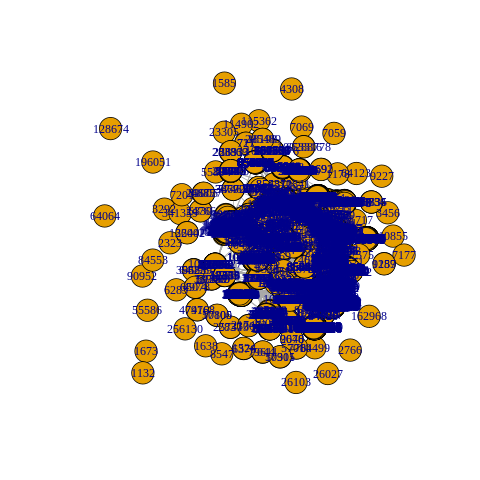

In [16]:
%%R
plot(HSnet)

Para esta aplicación, se eliminan los nodos de grado elevado; normalmente estos nodos representan genes constitutivos que se necesitan para mantener una célula con vida, pero no suelen ser específicos de una enfermedad concreta.

In [17]:
%%R
overly.attached.proteins <- which(degree(HSnet)>1000)
overly.attached.proteins

  351  7341  7316 10482  8452  6613  4738  1994 
    9    80   963  1451  2825  3383  3514  7402 


In [18]:
%%R
HSnet <- delete.vertices(HSnet, overly.attached.proteins)

#lo siguiente es TRUE si el grafo está conectado.
is.connected(HSnet)

[1] FALSE


### Genes que causan autismo

En primer lugar procedemos a leer la tabla `gene-id`:

In [19]:
%%R
gene.table <- read.delim("gene-id-table.txt")
names(gene.table)

[1] "Symbol" "ID"    


En segundo lugar, también hemos de leer la tabla de puntuaciones para los genes relacionados con el autismo (`gene-scores`):

In [20]:
%%R
gene.score<-read.csv("gene-score.csv",stringsAsFactors=F)
attach(gene.score)
names(gene.score)


    Score




[1] "Gene.Symbol"   "Gene.Name"     "Score.Details" "Score"        
[5] "Evidence"      "References"    "Scored.By"    


In [21]:
%%R
#mostrando las puntuaciones
unique(Score)

 [1] "4"  "3"  "1S" "S"  "6"  "5"  "1"  "2S" "2"  "3S" "4S"


Ahora podemos identificar aquellos genes con puntuaciones significativas:

In [22]:
%%R
signif.scores <- c("1S","1","2S","2","3S","3")
signif.genes <- Gene.Symbol[which(Score %in% signif.scores)]
signif.EIDs <- gene.table[which(gene.table[,1] %in% signif.genes),2]

Finalmente, podemos usar la red de interacciones `HSnet` que hemos creado anteriormente, para determinar los genes que están presentes en la red, y que se sabe que causan autismo:

In [23]:
%%R
geneEIDs <- as.numeric(V(HSnet)$name)
HSnetN <- HSnet
V(HSnetN)$name <- 1:length(V(HSnet))
signif.ids <- which(geneEIDs %in% signif.EIDs)
length(signif.ids)

[1] 100


## Desarrollar un interactoma del autismo

Importamos el script para calcular el `steiner_tree.R`, es decir, la subred de menor longitud que conecta cierto conjunto de nodos.

In [24]:
%%R
source('steiner_tree.R')

Identificar el *Steiner Tree* y cronometrar el tiempo que se tarda en ejecutar dicha función.

In [25]:
%%R
system.time(HS.stree <- steiner_tree(terminals=signif.ids, graph=HSnetN))

   user  system elapsed 
 21.047   0.021  21.144 


Mostrar el solapamiento entre significancia de autismo y vértices en el *Steiner Tree*

In [26]:
%%R
length(intersect(signif.ids,V(HS.stree)$name))
labels<-gene.table[as.numeric(V(HS.stree)$name),1]
labels<-as.character(labels)

Identificar los genes que tienen puntuaciones significativas y asignarles el color rojo

In [27]:
%%R
colors<-rep("skyblue",length(V(HS.stree)))
colors[which(as.numeric(V(HS.stree)$name) %in% signif.ids)] = "red"
#Asignar colores a los vértices del árbol
V(HS.stree)$color = colors

Exportar el nuevo gráfico a un archivo `.pdf`. Puede acceder al mismo en la barra lateral.

In [28]:
%%R
pdf("ASD_interactome.pdf",width=12, height=12)
system.time(plot(HS.stree,vertex.label=labels,vertex.size=5,vertex.label.cex=0.8))
dev.off()

png 
  2 


## Análisis y propiedades del interactoma del autismo

Para anlizar las propiedades del interactoma del autismoy compararlas con interactomas generados aleatoriamente, usaremos la librería `sna`:

In [29]:
%%R
install.packages('sna')
library(sna, quietly=TRUE)

(as ‘lib’ is unspecified)
























	‘/tmp/RtmpAJMwsB/downloaded_packages’

Attaching package: ‘statnet.common’



    attr, order


‘network’ 1.18.2 (2023-12-04), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information


Attaching package: ‘network’



    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute


Version 2.8 created on 2024-09-07.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.


Attaching package: ‘sna’



    betweenness, bonpow, closeness, components, degree, dyad.census,
    evcent, hierarchy, is.connected, neigh

En primer lugar, creamos una función que calcule las puntuaciones de conectividad de la red. En este caso, las puntuaciones son los diámetros de la red y la distancia geodésica media entre dos nodos cualesquiera:

In [30]:
%%R
c.scores<-function(graph){
    n <- length(V(graph))
    sp <- shortest.paths(graph)
    neighbors <- sum(sp==1)/2
    neighbors2 <- sum(sp==2)/2
    return(c(2*neighbors/(n*(n-1)),2*neighbors2/(n*(n-1))))
}

clus <- clusters(HSnetN,mode=c("weak"))
connected.ids <- which(clus$membership==1)
length(connected.ids)

[1] 17796


Generamos N subredes de forma aleatoria. Esto puede llevar cierto tiempo si N es grande.

In [31]:
%%R
N<-50
strees<-list(N)
effs<-numeric(N)
nei<-numeric(N)
nei2<-numeric(N)
for (i in 1:N){
    new.ids<-sample(x=connected.ids,size=length(signif.ids))
    strees[[i]] <- steiner_tree(terminals=new.ids,graph=HSnetN)
    effs[i]<-efficiency(get.adjacency(strees[[i]],sparse=F))
    cs<-c.scores(strees[[i]])
    nei[i]<-cs[1]
    nei2[i]<-cs[2]
}

Podemos mostrar las puntuaciones de eficiencia y conectividad para cada uno de los grafos aleatorios:

In [32]:
%%R
effs

 [1] 0.9854129 0.9770528 0.9758885 0.9852144 0.9734992 0.9743388 0.9779012
 [8] 0.9802469 0.9820294 0.9800504 0.9853882 0.9825707 0.9775673 0.9781481
[15] 0.9802509 0.9793388 0.9814082 0.9731554 0.9811580 0.9765291 0.9794464
[22] 0.9787047 0.9807769 0.9810198 0.9786122 0.9780331 0.9741722 0.9797188
[29] 0.9814533 0.9806542 0.9811617 0.9814302 0.9752414 0.9817901 0.9784568
[36] 0.9754560 0.9805562 0.9802509 0.9757760 0.9792453 0.9756243 0.9786371
[43] 0.9794218 0.9814089 0.9821597 0.9817421 0.9805540 0.9793959 0.9829281
[50] 0.9820730


In [33]:
%%R
nei

 [1] 0.02012315 0.02862777 0.02968801 0.02035182 0.03212797 0.03098541
 [7] 0.02750153 0.02516882 0.02348759 0.02545547 0.01999640 0.02282800
[13] 0.02798701 0.02725599 0.02513509 0.02619414 0.02436478 0.03213352
[19] 0.02417439 0.02869300 0.02628139 0.02695255 0.02482759 0.02468380
[25] 0.02694805 0.02743080 0.03142648 0.02594435 0.02428621 0.02498173
[31] 0.02419984 0.02427581 0.03036343 0.02363413 0.02694905 0.03028194
[37] 0.02489137 0.02513509 0.02983190 0.02619491 0.02995074 0.02701976
[43] 0.02604984 0.02426401 0.02314924 0.02371198 0.02457977 0.02616883
[49] 0.02253259 0.02341347


In [34]:
%%R
nei2

 [1] 0.0969974 0.1634027 0.1690640 0.1108115 0.1979433 0.1872335 0.1464088
 [8] 0.1376918 0.1200406 0.1566686 0.1016634 0.1362395 0.1572078 0.1527931
[15] 0.1287718 0.1384823 0.1309433 0.1784272 0.1425517 0.1611178 0.1505332
[22] 0.1524398 0.1447619 0.1351829 0.1371429 0.1447492 0.1725467 0.1386611
[29] 0.1192294 0.1364029 0.1298265 0.1343669 0.1699555 0.1462247 0.1485574
[36] 0.1617821 0.1367474 0.1411572 0.1791243 0.1626319 0.1714943 0.1539185
[43] 0.1422384 0.1452480 0.1305523 0.1314711 0.1303389 0.1368831 0.1270019
[50] 0.1344548


Finalmente, mostramos las puntuaciones de eficiencia y conectividad para el interactoma del autismo


In [35]:
%%R
efficiency(get.adjacency(HS.stree,sparse=F))

[1] 0.9723703


In [36]:
%%R
c.scores(HS.stree)

[1] 0.03438228 0.17686480


## Identificar nuevos genes candidatos

# Nueva sección

Calcular la puntuación de centralidad de intermediación para cada nodo

In [37]:
%%R
betweeness_centrality_scores = igraph::betweenness(HS.stree)

Identificar aquellos que no sabemos aún si son significativos


In [38]:
%%R
significant_centrality = c()
count = 0
for (i in 1:length(betweeness_centrality_scores)){
    if (!(as.numeric(names(betweeness_centrality_scores[i])) %in% signif.ids)) {
        significant_centrality = c(significant_centrality,betweeness_centrality_scores[i])
    }
}

Ordenar y mostrar el número de nodos significativos

In [39]:
%%R
significant_centrality = sort(significant_centrality, decreasing=TRUE)
length(significant_centrality)

[1] 49
